- load raw files from data folder
- vacuum correction
- select two modes
- plot re(a) vs re(b) and im(a) vs im(b)

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import numpy as np

In [6]:
import scipy.stats as sp

In [35]:
modeA = 171
modeB = 174
outputA = VacCorrected[modeA,:,:].flatten()  # Choose the mode to analyze
outputB = VacCorrected[modeB,:,:].flatten()  # Choose the mode to analyze

In [36]:
print "mode A: ", np.abs(outputA).mean()
print "mode B: ", np.abs(outputB).mean()

mode A:  84364.5080483
mode B:  80570.6960637


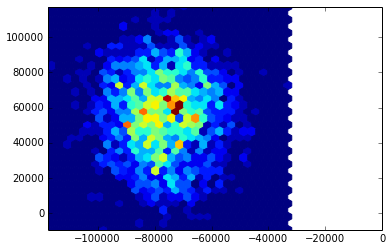

In [37]:
x = np.real(outputB)
y = np.real(outputA)
hexbin(x,y,gridsize=30)
xmin = min(x.min(),0)
xmax = max(x.max(),0)
ymin = min(y.min(),0)
ymax = max(y.max(),0)
axis([xmin, xmax, ymin, ymax])
savefig(filename_root + "_modes_" + str(modeA) + "_" + str(modeB) + "_real.png")

In [30]:
x = np.real(outputB)
y = np.real(outputA)
Tau, p_value = sp.pearsonr(x, y)

In [31]:
print "Pearson: ", Tau
print "p_value: ", p_value

Pearson:  0.665764573451
p_value:  2.23064502155e-256


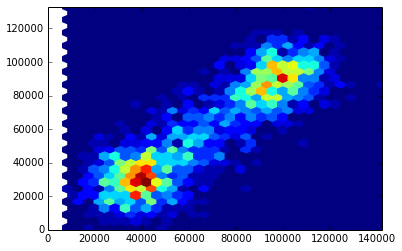

In [32]:
x = np.imag(outputB)
y = np.imag(outputA)
hexbin(x,y,gridsize=30)
xmin = min(x.min(),0)
xmax = max(x.max(),0)
ymin = min(y.min(),0)
ymax = max(y.max(),0)
axis([xmin, xmax, ymin, ymax])
savefig(filename_root + "_modes_" + str(modeA) + "_" + str(modeB) + "_imag.png")

In [33]:
x = np.imag(outputB)
y = np.imag(outputA)
Tau, p_value = sp.pearsonr(x, y)

In [34]:
print "Tau: ", Tau
print "p_value: ", p_value

Tau:  0.877233573772
p_value:  0.0


# Multiple Mode Correlation Analysis

In [8]:
cd '/home/photon/data/06-17-2014'

/home/photon/data/06-17-2014


In [9]:
ls

10-04-11_raw.npy  13-29-47_raw.npy  15-28-05_raw.npy
10-18-41_raw.npy  13-44-25_raw.npy  15-33-23_raw.npy
10-36-24_raw.npy  13-50-53_raw.npy  15-40-17_raw.npy
11-11-37_raw.npy  14-09-17_raw.npy  15-42-44_raw.npy
11-37-24_raw.npy  14-32-02_raw.npy  15-45-53_raw.npy
12-04-35_raw.npy  14-42-27_raw.npy  15-50-21_raw.npy
12-57-35_raw.npy  14-48-26_raw.npy  16-02-11_raw.npy
13-22-52_raw.npy  15-06-02_raw.npy  Testing new analysis.ipynb


In [10]:
vacuum_raw = np.load("15-45-53_raw.npy")

In [11]:
vacFFT = np.average(vacuum_raw,axis=(1,2))

In [12]:
filename_root = "16-02-11_raw"
data = np.load(filename_root + ".npy")

In [13]:
VacCorrected = data - vacFFT.reshape(600,1,1)

In [15]:
modeA = 170
outputA = VacCorrected[modeA,:,:].flatten()  # Choose the mode to analyze
y_real = np.real(outputA)
y_imag = np.imag(outputA)
x_real = []
x_imag = []
x_abs = []
output = []
Pearson_real = []
Pearson_imag = []
magnitude = []
modes = range(0,220)

for i in modes:
    output.append(VacCorrected[i,:,:].flatten())
    x_real.append(np.real(output[i]))
    x_imag.append(np.imag(output[i]))
    x_abs.append(np.abs(output[i]))
    RealPearson, p = sp.pearsonr(x_real[i], y_real)
    Pearson_real.append(RealPearson)
    ImagPearson, p = sp.pearsonr(x_imag[i], y_imag)
    Pearson_imag.append(ImagPearson)
    magnitude.append(np.average(x_abs[i]))

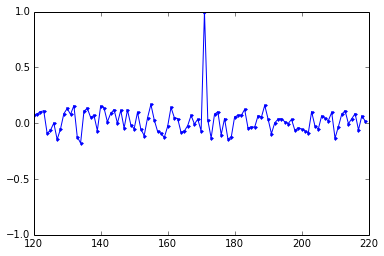

In [153]:
plot(modes,Pearson_real,".-")
axis([120,220,-1,1])
savefig(filename_root + "_mode_" + str(modeA) + "_real.png")

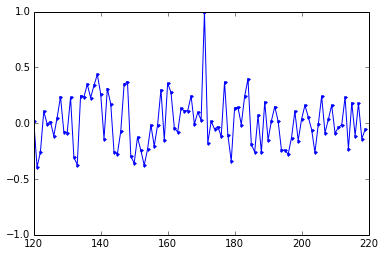

In [154]:
plot(modes, Pearson_imag,".-")
axis([120,220,-1,1])
savefig(filename_root + "_mode_" + str(modeA) + "_imag.png")

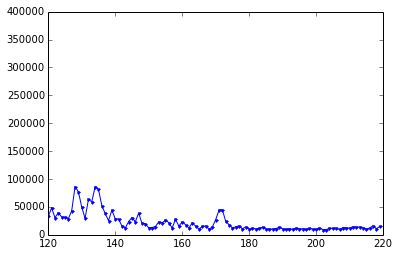

In [155]:
plot(modes, (magnitude),".-")
xlim((120,220))
ylim((0,4e5))
savefig(filename_root + "_mag.png")